
# 🚖 Uber Rides Data Cleaning & EDA


In [3]:

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


In [4]:

# Load raw dataset
df = pd.read_csv("Uber-Jan-Feb-FOIL.csv")
df.head()


,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [15]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract features for Power BI
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['week_number'] = df['date'].dt.isocalendar().week
df['hour'] = df['date'].dt.hour

# Order weekdays for proper sorting in visuals
weekday_order = {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4,
                 "Friday": 5, "Saturday": 6, "Sunday": 7}
df['weekday_order'] = df['weekday'].map(weekday_order)

# Remove duplicates
df = df.drop_duplicates()

# Ensure correct data types
df['active_vehicles'] = pd.to_numeric(df['active_vehicles'], errors='coerce')
df['trips'] = pd.to_numeric(df['trips'], errors='coerce')

# Drop rows with missing critical fields
df = df.dropna(subset=['dispatching_base_number', 'date', 'active_vehicles', 'trips'])

df.head()

,dispatching_base_number,date,active_vehicles,trips,year,month,day,weekday,week_number,weekday_order,hour
0,B02512,2015-01-01,190,1132,2015,1,1,Thursday,1,4,0
1,B02765,2015-01-01,225,1765,2015,1,1,Thursday,1,4,0
2,B02764,2015-01-01,3427,29421,2015,1,1,Thursday,1,4,0
3,B02682,2015-01-01,945,7679,2015,1,1,Thursday,1,4,0
4,B02617,2015-01-01,1228,9537,2015,1,1,Thursday,1,4,0


In [16]:

print("Shape:", df.shape)
df.info()
df.describe()


Shape: (354, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips                    354 non-null    int64         
 4   year                     354 non-null    int32         
 5   month                    354 non-null    int32         
 6   day                      354 non-null    int32         
 7   weekday                  354 non-null    object        
 8   week_number              354 non-null    UInt32        
 9   weekday_order            354 non-null    int64         
 10  hour                     354 non-null    int32         
dtypes: UInt32(1), datetime64[ns](1), int32(4), int64(3), object(2)
memory usage: 24.

,date,active_vehicles,trips,year,month,day,week_number,weekday_order,hour
count,354,354.000000,354.000000,354.0,354.000000,354.000000,354.0,354.000000,354.0
mean,2015-01-30 00:00:00,1307.435028,11667.316384,2015.0,1.474576,15.288136,5.135593,4.050847,0.0
min,2015-01-01 00:00:00,112.000000,629.000000,2015.0,1.000000,1.000000,1.0,1.000000,0.0
25%,2015-01-15 00:00:00,296.750000,2408.500000,2015.0,1.000000,8.000000,3.0,2.000000,0.0
50%,2015-01-30 00:00:00,1077.000000,9601.000000,2015.0,1.000000,15.000000,5.0,4.000000,0.0
75%,2015-02-14 00:00:00,1417.000000,13711.250000,2015.0,2.000000,23.000000,7.0,6.000000,0.0
max,2015-02-28 00:00:00,4395.000000,45858.000000,2015.0,2.000000,31.000000,9.0,7.000000,0.0
std,NaN,1162.510626,10648.284865,0.0,0.500060,8.588913,2.456126,1.972247,0.0


In [17]:

df.isnull().sum()


dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
year                       0
month                      0
day                        0
weekday                    0
week_number                0
weekday_order              0
hour                       0
dtype: int64

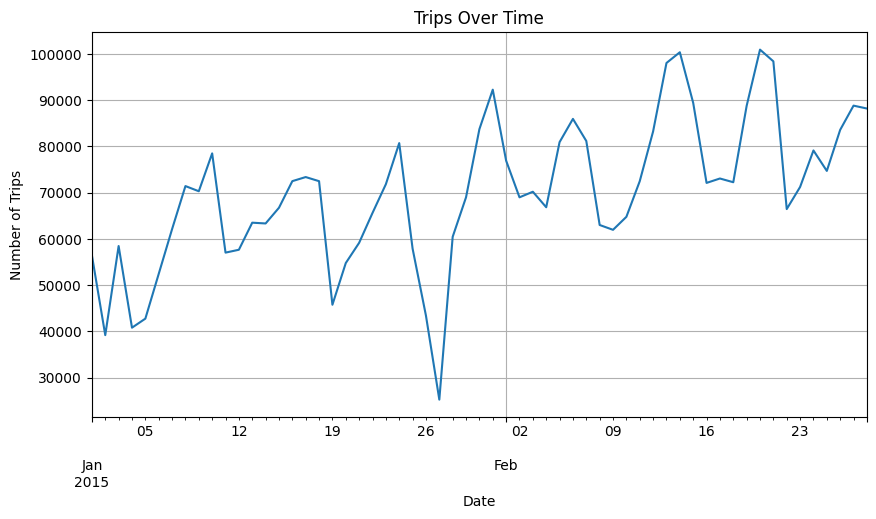

In [18]:

plt.figure(figsize=(10,5))
df.groupby('date')['trips'].sum().plot()
plt.title("Trips Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.show()


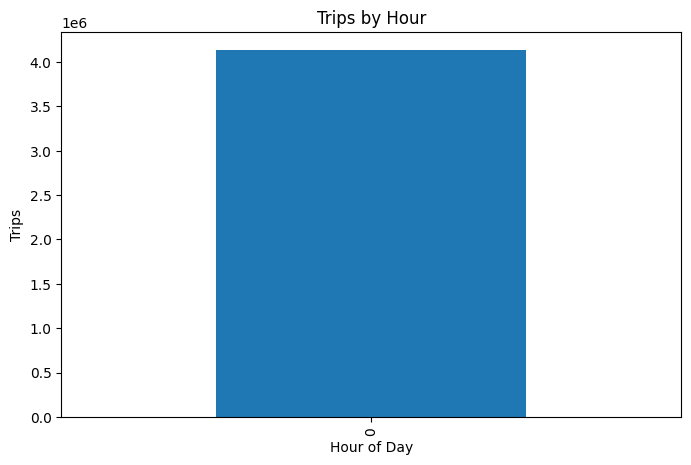

In [19]:

plt.figure(figsize=(8,5))
df.groupby('hour')['trips'].sum().plot(kind='bar')
plt.title("Trips by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Trips")
plt.show()


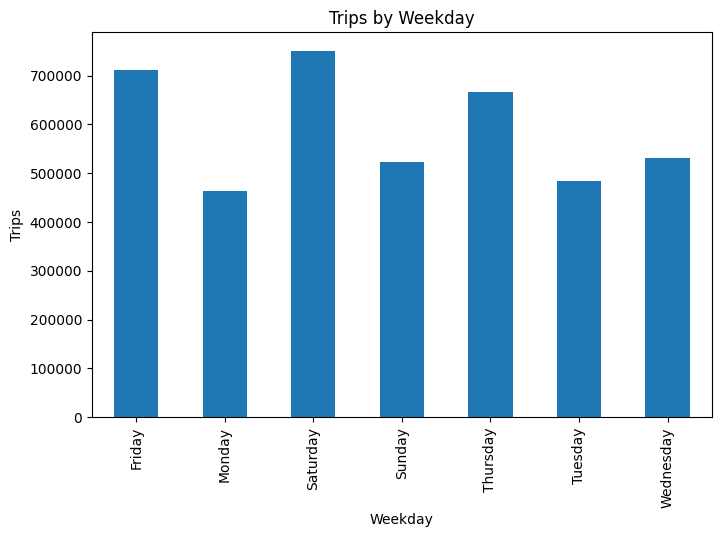

In [20]:

plt.figure(figsize=(8,5))
df.groupby('weekday')['trips'].sum().plot(kind='bar')
plt.title("Trips by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Trips")
plt.show()


In [12]:

# Save cleaned dataset for Power BI usage
df.to_csv("uber_cleaned.csv", index=False)
print("Cleaned dataset saved as uber_cleaned.csv")


Cleaned dataset saved as uber_cleaned.csv


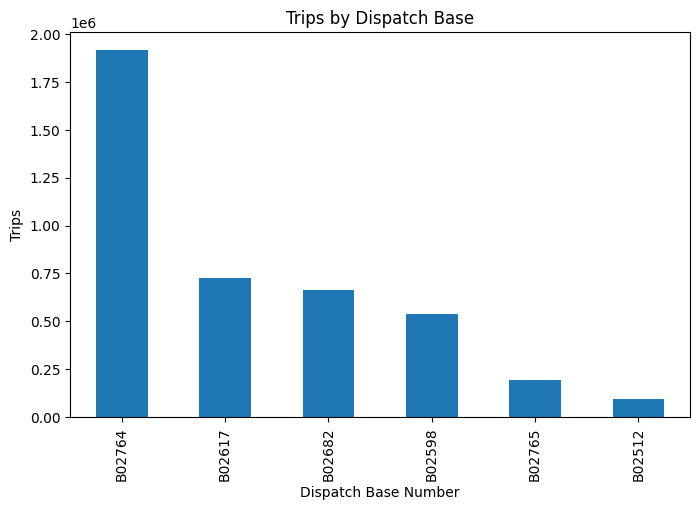

In [13]:

plt.figure(figsize=(8,5))
df.groupby('dispatching_base_number')['trips'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Trips by Dispatch Base")
plt.xlabel("Dispatch Base Number")
plt.ylabel("Trips")
plt.show()
